In [46]:
!pip install emcee
!pip install corner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.5 MB/s eta 0:00:00


In [47]:
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
drive.mount('/content/drive', force_remount=True)
from IPython.display import clear_output
import time
from tqdm import tqdm
from matplotlib  import cm
import emcee
import corner
import os

Mounted at /content/drive


In [48]:
file = '/content/drive/MyDrive/Maxwell.csv'
file

'/content/drive/MyDrive/Maxwell.csv'

In [49]:
data = pd.read_csv(file,sep=',')
data.keys()

Index(['Velocidad'], dtype='object')

In [50]:
X = np.array(data['Velocidad'])
X

array([547.26577301, 449.92041803, 773.81438168, ..., 594.98139795,
       376.38861535, 539.81313978])

472.17578290610606

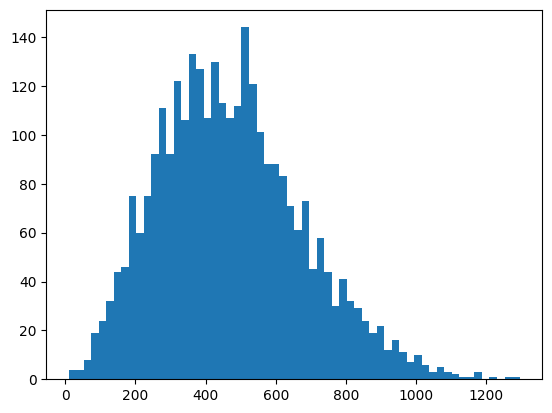

In [51]:
plt.hist(X,bins=60)
X.mean()

In [53]:
#Likelihood
M = 0.028
Kb = 8.31
def Likelihood(T,v):
  return 4*np.pi*v**2*np.exp(-(M*v**2)/(2*Kb*T))*(M/(2*np.pi*Kb*T))**(3/2)



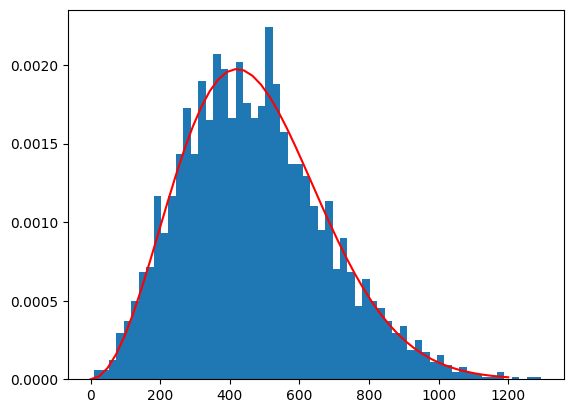

In [54]:
plt.hist(X,bins=60,density=True)
x = np.linspace(0,1200,50)
plt.plot(x,Likelihood(298,x),color='r')
plt.show()

In [55]:
def JointLikelihood(t,v):
  return -np.sum( np.log(Likelihood(t,v)))

In [56]:
t0 = 300
import scipy.optimize as spo
result = spo.minimize(JointLikelihood,t0,args=(X))
result.x

array([297.89468413])

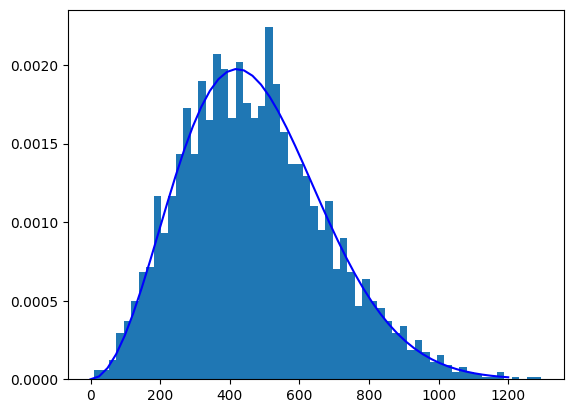

In [57]:
plt.hist(X,bins=60,density=True)
x = np.linspace(0,1200,50)
plt.plot(x,Likelihood(result.x,x),color='b')
plt.show()

In [58]:
VelProb = np.sqrt((2*8.31*result.x)/M)
VelProb

array([420.5018112])

In [60]:
VelProm = (2/np.sqrt(np.pi))*VelProb
VelProm #El valor obtenido está cerca al del promedio calculado anteriormente. Esto puede variar debido a las magnitudes usadas para las constantes

array([474.48548349])

In [61]:
VelCuadratica = np.sqrt((3*8.31*result.x)/M)
VelCuadratica

array([515.00743668])

In [142]:
def JointLikelihood2(t,v):
  return np.sum( np.log(Likelihood(t,v)))

In [143]:
def LogPrior(t):
  if 0 < t < 350 :
    return 0.0
  else:
    return -np.inf

In [144]:
def LogPosterior(p,x):

  LogP = LogPrior(p)
  if not np.isfinite(LogP):
    return -np.inf
  else:
    return LogP + JointLikelihood2(p,x)

In [145]:
LogPosterior(200,X)

-20564.304918426475

In [146]:
# Paquete
n_walkers, n_params = 10,1
p0 = np.zeros((n_walkers, n_params))
p0[:,0] = 300
p0 += np.random.rand(n_walkers, n_params)


In [147]:
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(X,))
pos,prob,state = sampler.run_mcmc(p0,10000,progress=True)

100%|██████████| 10000/10000 [00:18<00:00, 529.19it/s]


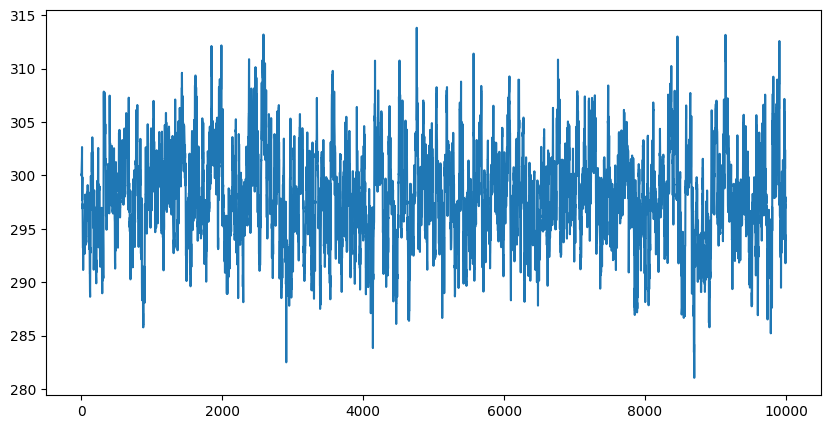

In [151]:
fig, axes = plt.subplots(1, figsize=(10,5), sharex=True)
samples = sampler.get_chain()
axes.plot(samples[:, 0])


In [152]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
truths = np.percentile(flat_samples, 50, axis=0)
truths


array([297.97394243])

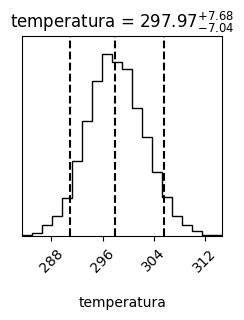

In [157]:
figure = corner.corner(flat_samples,labels=labels, quantiles=[0.05, 0.5, 0.95], show_titles=True)

In [158]:
upperlimits = np.percentile(flat_samples, 95.0, axis=0)
upperlimits

array([305.65869982])